In [10]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 200

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 1.013 Seconds
Building LP ...
	Done. Took 0.869 Seconds
Building M ...
	Done. Took 2.074 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 53.571
	Done. Took 46.006 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): -6.358*(0.858)^t + -6.236*(0.949)^t + 9.748*(0.975)^t + -0.546*(0.997)^t + 3.390662 * delta(t,0)
		RMSE = 0.200
		Matlab: [-6.36  0.86 -6.24  0.95  9.75  0.97 -0.55  1.  ]
	Done. Took 35.404 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): -3.093*(0.481)^t + 3.499*(0.271)^t + 7.047*(0.136)^t + -0.242*(0.422)^t + -7.210787 * delta(t,0)
		RMSE = 0.058
		Matlab: [-3.09  0.48  3.5   0.27  7.05  0.14 -0.24  0.42]
	Done. Took 16.636 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1): -6.971*(-0.554)^t + 3.038*(0.485)^t + 10.000*(-0.268)^t + 10.000*(-0.268)^t + -16.066593

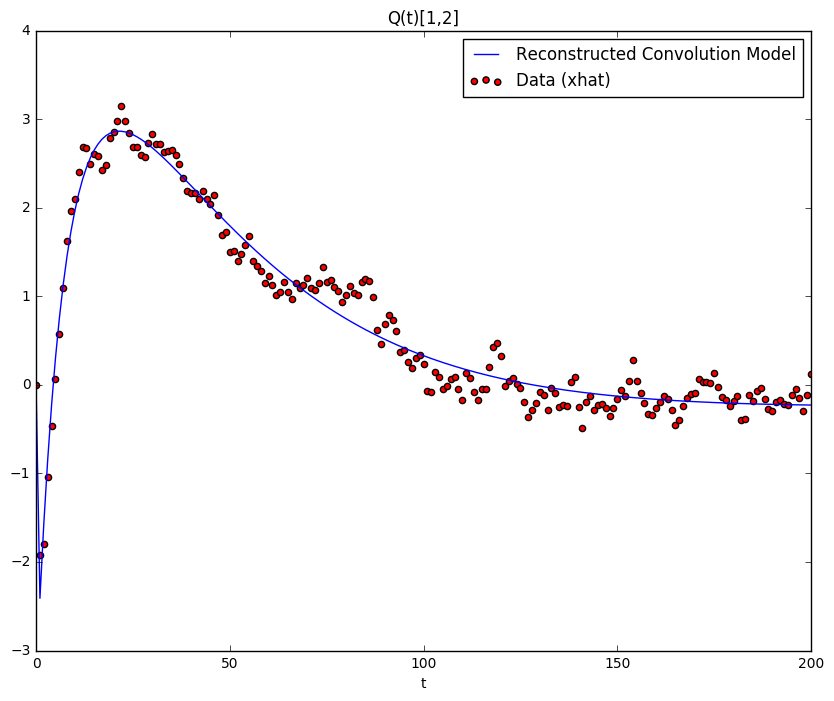

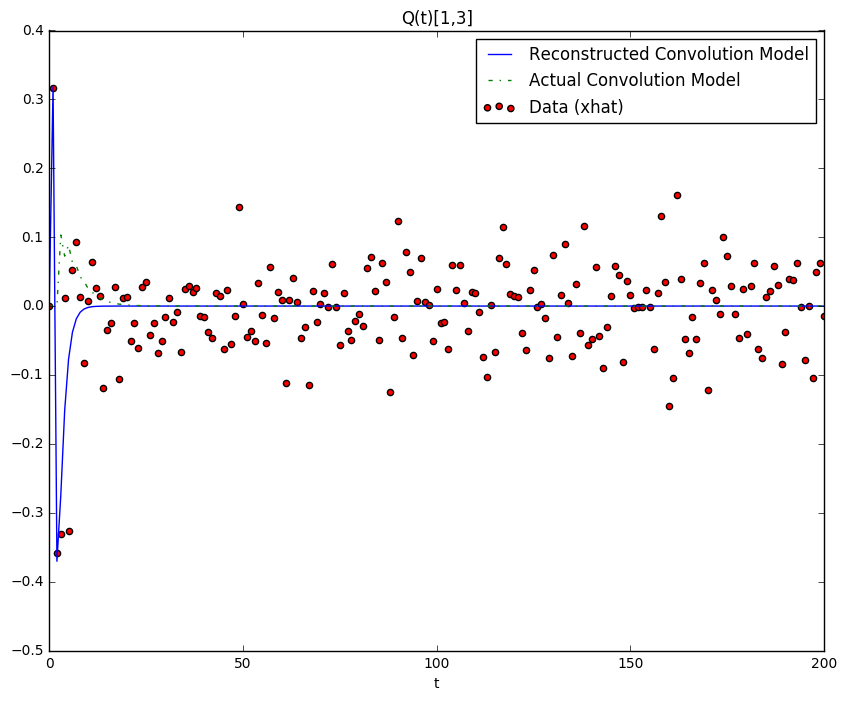

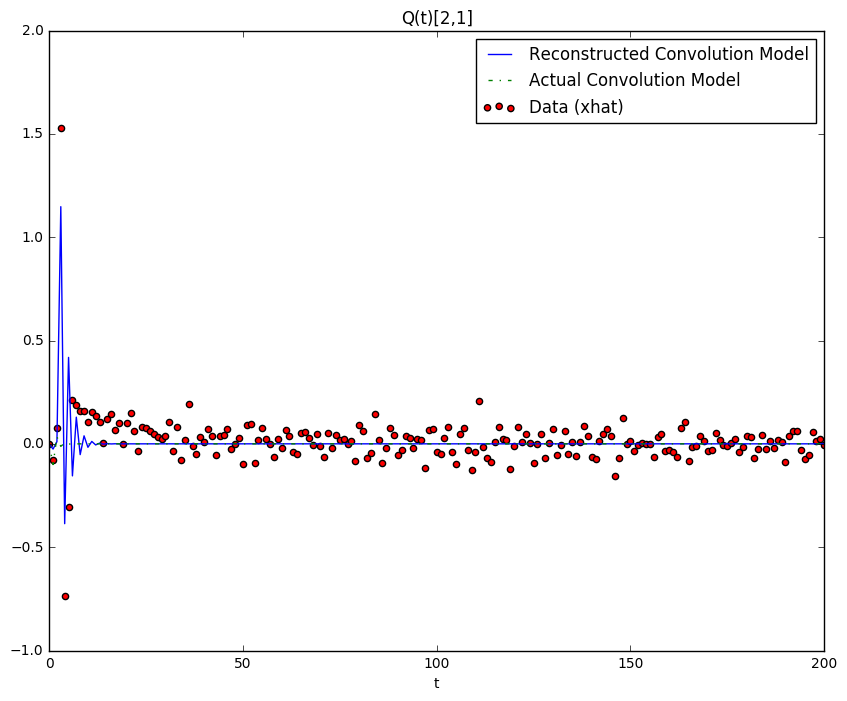

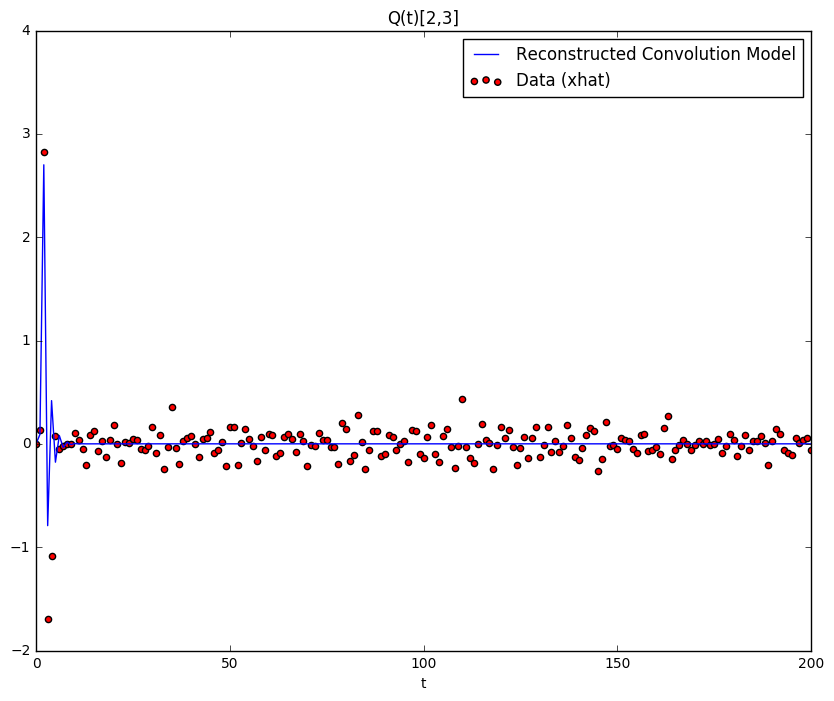

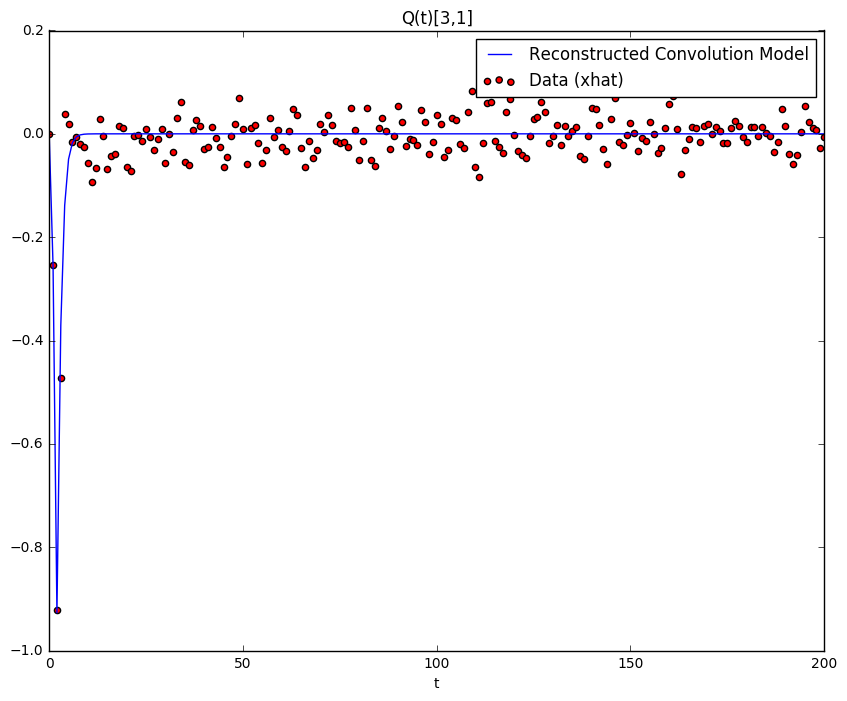

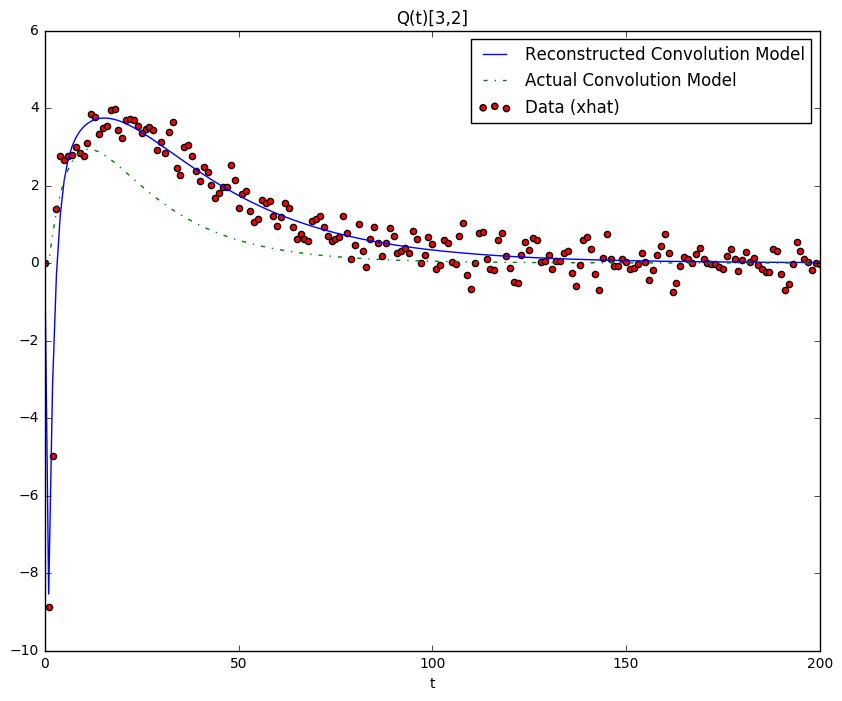

In [11]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 12 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

# Pbool = np.identity(3)
T22 = np.matrix('[1 0 0 0 ; 0 1 0 0 ; 0 0 0 0 ; 0 0 1 0 ; 0 0 0 0 ; 0 0 0 0 ; 0 0 0 1]')
T22 = np.array(T22)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, T22=T22, max_iterations=1000, bounds=10, order=4, real_params=real_params, robust=False)
rs = recon.measured(y, u, plot=True)  #, ij=(1,3))

In [12]:
cols = [str(i+1) for i in range(3)]

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))
        
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-6.35750231779 0.857512327745 -6.23586483327 0.94895717522 9.74843155387 0.974771944523 -0.545726688729 0.996797498967 ; -3.09305349071 0.480574835473 3.4989859177 0.270681731948 7.0470669784 0.136201383078 -0.242212633426 0.422084644966 ; -6.97119076562 -0.554191034737 3.03778354294 0.484895683669 10.0 -0.268086774254 10.0 -0.268085582624 ; 10.0 -0.447730755426 10.0 0.152200137771 10.0 0.152377179086 10.0 0.152236611616 ; -10.0 0.346194266285 10.0 0.118272042397 9.76084774798 0.135904584424 -10.0 -0.0697179043 ; -8.96573266791 0.912575521288 -10.0 0.501427038821 10.0 0.966662263488 -10.0 0.501427223024], {'1', '2', '3'});
